# GlobalAveragePooling (GAP)
- Feature map의 채널별로 평균값을 추출 1 x 1 x channel 의 Feature map을 생성
- `model.add(keras.layers.GlobalAveragePooling2D())`
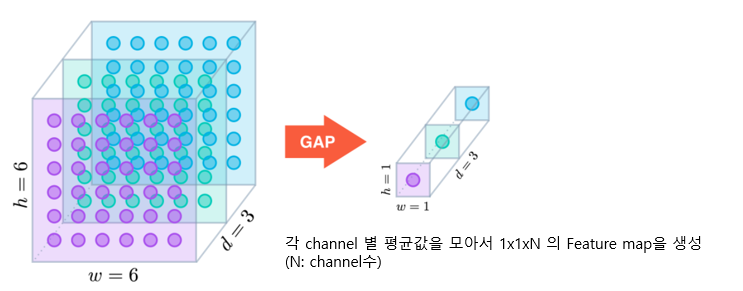

- Feature Extraction layer에서 추출한 Feature map을 Classifier layer로 Flatten해서 전달하면 많은 연결노드와 파라미터가 필요하게된다. GAP를 사용하면 노드와 파라미터의 개수를 효과적으로 줄일 수 있다.
- Feature map의 채널수가 많을 경우 GAP를 사용하는 것이 효과적이나 채널수가 적다면 Flatten을 사용하는 것이 좋다.
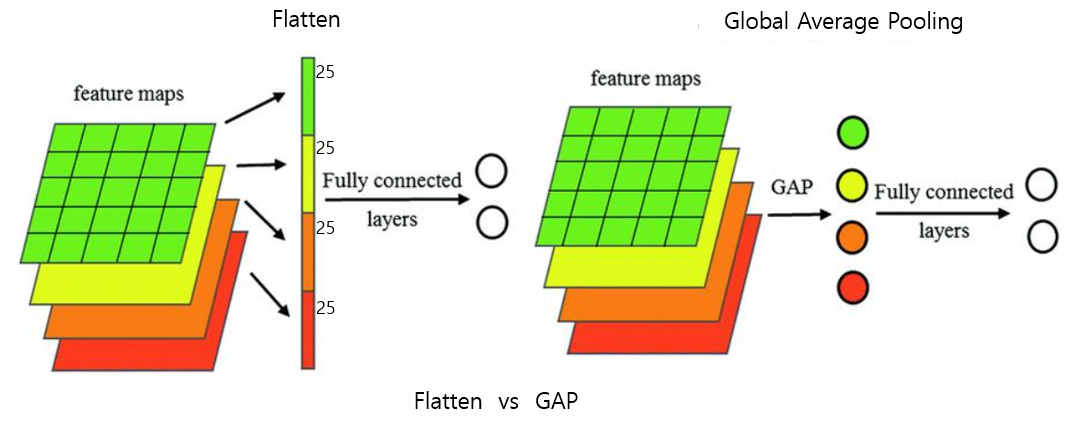

In [ ]:
!pip install gdown

In [55]:
# 이미지 다운로드
import gdown
url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
fname = 'cats_and_dogs_small.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU
To: C:\Users\Playdata\04_deeplearning\cats_and_dogs_small.zip
90.8MB [00:08, 10.9MB/s]


'cats_and_dogs_small.zip'

In [ ]:
!mkdir data

In [ ]:
## 압축 풀기
!unzip -q ./cats_and_dogs_small.zip -d data/cats_and_dogs_small

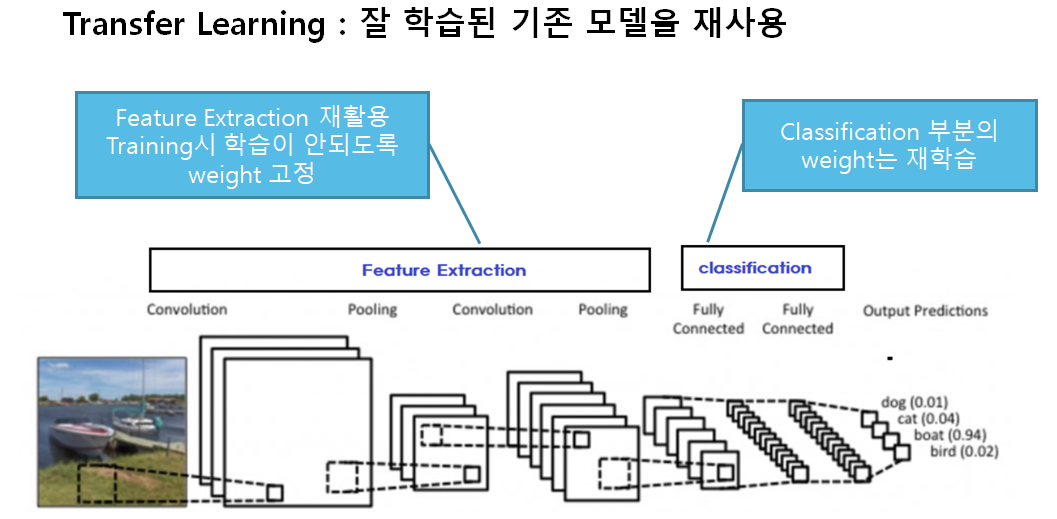

## Transfer learning (전이학습)
- 큰 데이터 셋을 이용해 미리 학습된 pre-trained Model의 Weight를 사용하여 현재 하려는 예측 문제에 활용. 
- ### Convolution base(Feature Extraction 부분)만 활용
    - Convolution base는 이미지에 나타나는 일반적인 특성을 파악하기 위한 부분이므로 재사용할 수 있다.
    - Classifier 부분은 학습하려는 데이터셋의 class들에 맞게 변경 해야 하므로 재사용할 수 없다.
- Pretrained Convlution layer의 활용 
    - Feature extraction
        - 학습시 학습되지 않고 Feature를 추출하는 역할만 한다.
    - Fine tuning
        - 학습시 Pretrained Covolution layer도 같이 학습해서 내 데이터셋에 맞춘다.

## Feature extraction
- 기존의 학습된 network에서 fully connected layer를 제외한 나머지 weight를 고정하고 새로운 목적에 맞는 fully connected layer를 추가하여 추가된 weight만 학습하는 방법
- `tensorflow.keras.applications` module이 지원하는  image classification models
    - (https://www.tensorflow.org/api_docs/python/tf/keras/applications)    

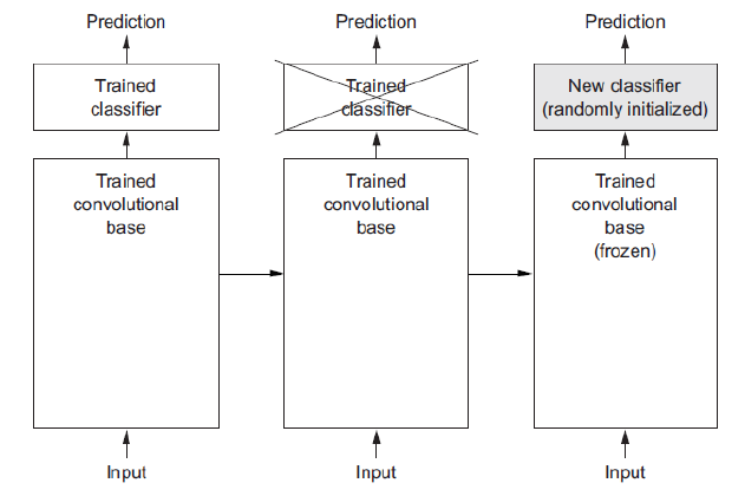

# Pre-Trained Model(미리 학습된 모델)을 이용한 전이학습

## Keras에서 제공하는 Pre-Trained Model 
- tensorflow.keras.applications 패키지를 통해 제공
    - https://www.tensorflow.org/api_docs/python/tf/keras/applications?hl=ko
    - Modules
        - 각 모델 생성 함수와 전처리 함수제공
    - Functions
        - 모델 생성함수 제공
- 모델 생성함수의 주요 매개변수
    - `weights`: 모형의 학습된 weight. 기본값- 'imagenet'
    - `include_top`: fully connected layer를 포함할지 여부. True 포함시킴, False: 포함 안 시킴
    - `input_shape`: 사용자가 입력할 이미지의 크기 shape. 3D 텐서로 지정. (높이, 너비, 채널). 기본값: (224,224, 3)

In [1]:
from tensorflow import keras

In [9]:
# Keras Pretrained 모델을 조회
vgg16 = keras.applications.VGG16(weights='imagenet', 
                                 include_top=False, #classification layer를 가져올지 여부 (False: 안가져오겠다.=>Conv layer들만 가져온다.)
                                 input_shape=(224,224,3))

In [10]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
vgg16_2 = keras.applications.VGG16(weights='imagenet', 
                                 include_top=True, #classification layer를 가져올지 여부 (False: 안가져오겠다.=>Conv layer들만 가져온다.)
                                 input_shape=(224,224,3))

In [5]:
vgg16_2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [78]:
resnet50 = keras.applications.ResNet50V2(include_top=False, input_shape=(224,224,3)) #weights('imagenet'), input_shape(224,224,3)은 default을 사용

In [79]:
resnet50.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

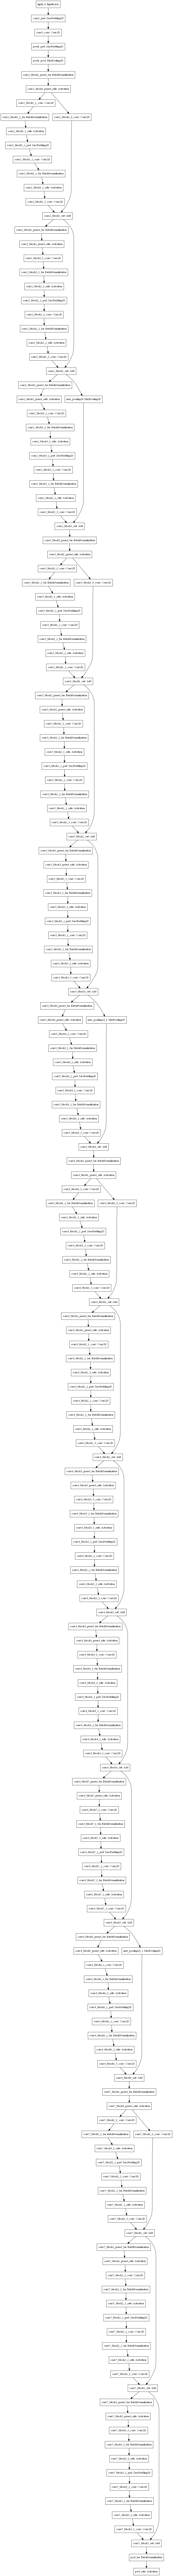

In [14]:
keras.utils.plot_model(resnet50)

In [15]:
mobilenet = keras.applications.MobileNet(include_top=False)

17227776/17225924 [==============================] - 2s 0us/step


In [16]:
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 

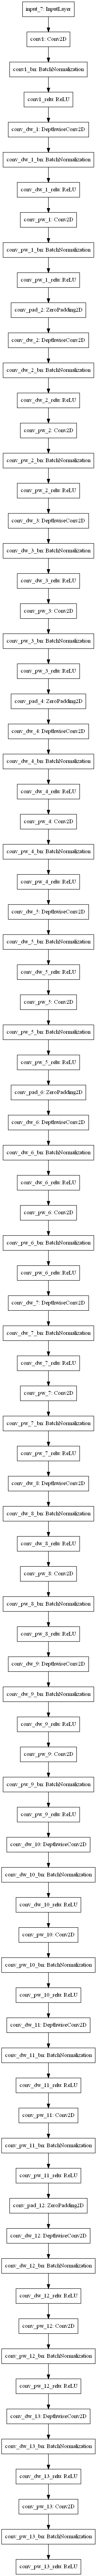

In [18]:
keras.utils.plot_model(mobilenet)

### Pretrained 모델을 이용한 추론
- 전이학습(재학습) 없이 추론

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import applications

import numpy as np

#### vgg16 모델 사용

In [44]:
# 추론할 이미지를 로드(load)
# img = load_img('data/dog.jpg', target_size=(224,224)) #pillow jpg image 타입
# img = load_img('data/shark.jpg', target_size=(224,224))
img = load_img('data/drone.jpg', target_size=(224,224))
img_np = img_to_array(img) # ndarray 변환
print(img_np.shape)
img_np = img_np[np.newaxis, ...] #batch 축 추가.
print(img_np.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [45]:
# image 전처리 
img_tensor = applications.vgg16.preprocess_input(img_np) #케라스 VGG16 모델에서 했던 전처리 방식을 적용

In [46]:
# 모델 생성 및 추론
vgg16 = applications.VGG16() #include_top=True(기본) - classification layer를 포함.
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [47]:
pred = vgg16.predict(img_tensor)

In [48]:
len(pred[0])

1000

In [49]:
pred_label = np.argmax(pred, axis=1)
pred_label, pred[0, 3]

(array([895], dtype=int64), 1.8254577e-05)

https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json

In [50]:
pred_cls = applications.vgg16.decode_predictions(pred, top=3) #가장 높은 확률로 예측한 top n(5)개의 label을 출력

In [51]:
pred_cls

[[('n04552348', 'warplane', 0.2358244),
  ('n04008634', 'projectile', 0.14772792),
  ('n03773504', 'missile', 0.13691582)]]

#### mobilenet 이용해 추론

In [38]:
# 추론할 이미지를 로드(load)
# img = load_img('data/dog.jpg', target_size=(224,224)) #pillow jpg image 타입
# img = load_img('data/shark.jpg', target_size=(224,224))
img = load_img('data/drone.jpg', target_size=(224,224))
img_np = img_to_array(img) # ndarray 변환
print(img_np.shape)
img_np = img_np[np.newaxis, ...] #batch 축 추가.
print(img_np.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [39]:
# 전처리
img_tensor = applications.mobilenet.preprocess_input(img_np)

In [40]:
m_net = applications.MobileNet()

In [43]:
pred = m_net.predict(img_tensor)
pred_label = np.argmax(pred, axis=-1)
pred_label

array([669], dtype=int64)

In [42]:
pred_cls = applications.mobilenet.decode_predictions(pred)
pred_cls

[[('n04552348', 'warplane', 0.15788557),
  ('n04162706', 'seat_belt', 0.10001421),
  ('n04485082', 'tripod', 0.095572755),
  ('n03773504', 'missile', 0.08409593),
  ('n04286575', 'spotlight', 0.06885863)]]

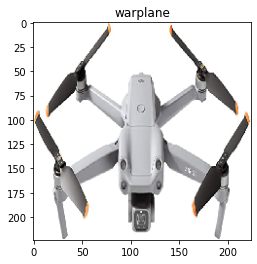

In [52]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(pred_cls[0][0][1])
plt.show()

## Feature extraction의 두 가지 방법
1. **빠른 추출방식**
    - 예측하려는 새로운 데이터를 위의 `conv_base`에 입력하여 나온 출력값을 numpy 배열로 저장하고 이를 분류 모델의 입력값으로 사용. Convolution operation을 하지 않아도 되기 때문에 빠르게 학습. 하지만 data augmentation 방법을 사용할 수 없음.

2. **받아온 특성 Layer를 이용해 새로운 모델 구현하는 방식**
    - 위의 `conv_base` 이후에 새로운 layer를 쌓아 확장한 뒤 전체 모델을 다시 학습. 모든 데이터가 convolution layer들을 통과해야 하기 때문에 학습이 느림. 단 conv_base의 가중치는 업데이트 되지 않도록 한다. data augmentation 방법을 사용할 수 있음.

### 빠른 특성 추출 방식


- Pretrained 된 `conv_base`의 predict 메소드로 입력 이미지의 feature를 추출 

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

In [56]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 30
N_BATCHS = 100

IMAGE_SIZE = (224, 224)

In [60]:
conv_base = applications.VGG16(include_top=False, input_shape=(224,224,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [63]:
def extract_featuremap(img_path, sample_counts):
    """
    매개변수로 받은 경로의 이미지들을 Feature Extractor 모델(Conv base)을 통과 시켜 Feature Map들을 추출해 반환하는 함수
    [매개변수]
        img_path: str - 이미지 데이터셋이 있는 root 경로
        sample_count: int - 특성을 추출할 이미지 개수
    [반환값]
        Tuple: (feature map들: ndarray, label: ndarray)
    """
    conv_base = applications.VGG16(include_top=False, input_shape=IMAGE_SIZE+(3,))
    # 결과를 담을 ndarray 생성
    # feature map을 담을 ndarray
    result_featuremaps = np.zeros(shape=(sample_counts, 7, 7, 512))  #conv_base의 출력 shape와 맞춰준다.
    # label을 담을 ndarray
    result_labels = np.zeros(shape=(sample_counts, ))
    
    # ImageDataGenerator생성
    img_gen = ImageDataGenerator(preprocessing_function=applications.vgg16.preprocess_input) #전처리 함수를 설정
    img_iter = img_gen.flow_from_directory(img_path, target_size=IMAGE_SIZE, batch_size=N_BATCHS, class_mode='binary')
    
    cnt = 0 #반복횟수
    for input_batch, label_batch in img_iter:
        feature_map = conv_base.predict(input_batch) #batch단위로 읽어온 이미지를  conv_base를 이용해 predict => output feature map이 반환된다.
        # 결과를 담을 ndarray에 추가
        result_featuremaps[cnt*N_BATCHS: (cnt+1)*N_BATCHS] = feature_map
        result_labels [cnt*N_BATCHS: (cnt+1)*N_BATCHS] = label_batch
        
        cnt += 1
        if cnt*N_BATCHS >= sample_counts: #다음 결과를 저장할 배열의 시작 index가 sample_counts 이상이면 반복문을 빠져 나온다. (원하는 개수의 feature map을 다 저장했으므로.)
            break
    
    return result_featuremaps, result_labels
    

In [64]:
train_path = 'data/cats_and_dogs_small/train/'
validation_path = 'data/cats_and_dogs_small/validation/'
test_path = 'data/cats_and_dogs_small/test/'

train_features, train_labels = extract_featuremap(train_path, 2000)
validation_features, validation_labels = extract_featuremap(validation_path, 1000)
test_features, test_labels = extract_featuremap(test_path, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [65]:
train_features.shape, train_labels.shape

((2000, 7, 7, 512), (2000,))

In [66]:
np.unique(train_labels)

array([0., 1.])

In [67]:
validation_features.shape, validation_labels.shape

((1000, 7, 7, 512), (1000,))

In [68]:
test_features.shape, test_labels.shape

((1000, 7, 7, 512), (1000,))

### classification 모델 네크워크 정의 학습

In [69]:
def create_model_1():
    model = keras.Sequential()
    model.add(layers.GlobalAveragePooling2D(input_shape=(7,7,512))) #Input=>VGG16을 통과한 Feature map => GAP이용해서 flatten 
    #output layer
    model.add(layers.Dense(units=1, activation='sigmoid')) #sigmoid를 사용한 2진분류 output layer
    
    return model

In [70]:
model_1 = create_model_1()
model_1.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [72]:
hist = model_1.fit(train_features, train_labels, 
                   epochs=N_EPOCHS,
                   batch_size=N_BATCHS,
                   validation_data=(validation_features, validation_labels)
                  )

Epoch 1/30
20/20 [==============================] - 1s 41ms/step - loss: 4.1463 - accuracy: 0.3555 - val_loss: 1.9676 - val_accuracy: 0.5670
Epoch 2/30
20/20 [==============================] - 0s 16ms/step - loss: 1.2709 - accuracy: 0.6860 - val_loss: 0.5803 - val_accuracy: 0.8250
Epoch 3/30
20/20 [==============================] - 0s 18ms/step - loss: 0.5176 - accuracy: 0.8485 - val_loss: 0.3076 - val_accuracy: 0.8980
Epoch 4/30
20/20 [==============================] - 0s 17ms/step - loss: 0.3385 - accuracy: 0.8905 - val_loss: 0.2307 - val_accuracy: 0.9230
Epoch 5/30
20/20 [==============================] - 0s 19ms/step - loss: 0.2584 - accuracy: 0.9200 - val_loss: 0.1899 - val_accuracy: 0.9410
Epoch 6/30
20/20 [==============================] - 0s 17ms/step - loss: 0.2099 - accuracy: 0.9305 - val_loss: 0.1712 - val_accuracy: 0.9480
Epoch 7/30
20/20 [==============================] - 0s 15ms/step - loss: 0.1778 - accuracy: 0.9390 - val_loss: 0.1589 - val_accuracy: 0.9520
Epoch 8/30
20

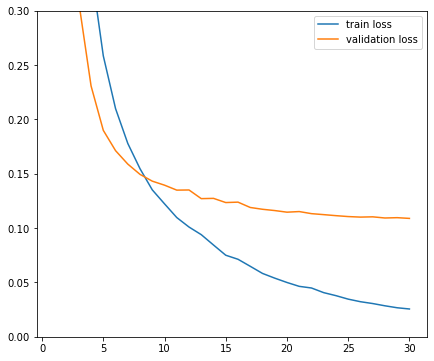

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')
plt.ylim(0, 0.3)
plt.legend()
plt.show()

In [77]:
model_1.evaluate(test_features, test_labels)

32/32 [==============================] - 0s 6ms/step - loss: 0.0989 - accuracy: 0.9760


[0.09885498881340027, 0.9760000109672546]

## Pretrained Network를 이용해 새로운 모델 구현하는 방식

- Conv_base의 feature extraction 부분에 fully connected layer를 추가하여 모형 생성 
- Conv_base에서 가져온 부분은 학습을 하지 않고 weight를 고정
    -  **Layer.trainable=False**

## 미세조정(Fine-tuning)
- Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)에 재학습시키는 것을 fine tunning 이라고 한다.
- 주어진 문제에 더 적합하도록 모델의 가중치들을 조정.

### Fine tuning 전략
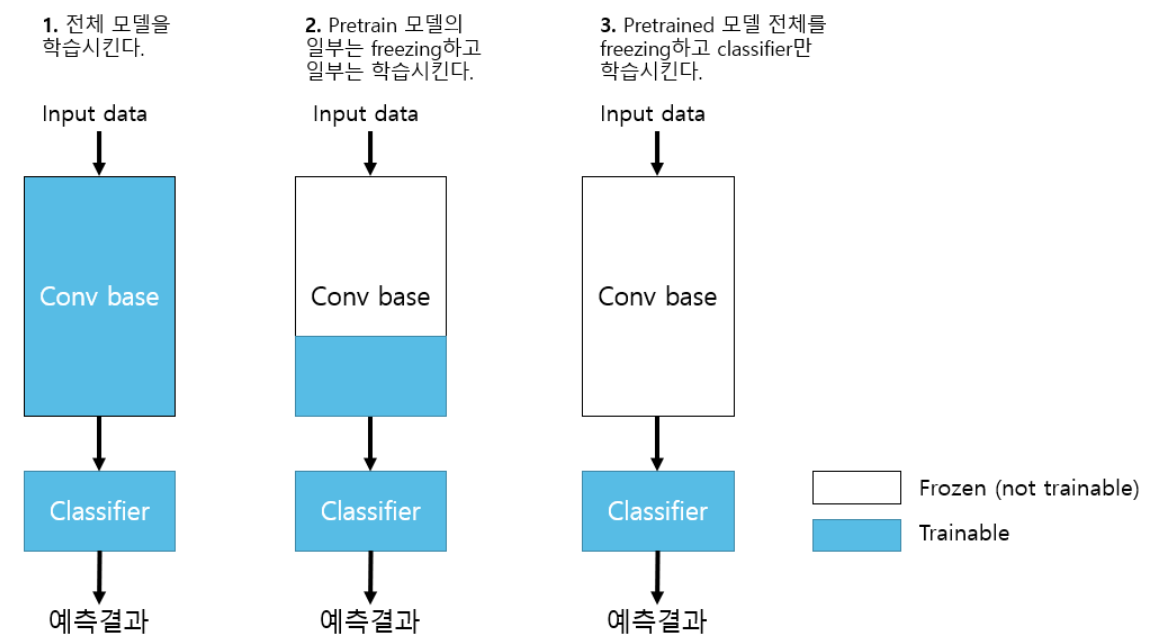

- **세 전략 모두 classifier layer들은 train한다.**

1. <span style="font-size:1.2em;font-weight:bold">전체 모델을 전부 학습시킨다.(1번)</span>
    - Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
    - **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
    - 학습에 시간이 많이 걸린다.
2. <span style="font-size:1.2em;font-weight:bold">Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.(2번)</span>
    - **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
    - **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용
3. <span style="font-size:1.2em;font-weight:bold">Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시킨다.(3번)</span>
    - **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
  
  
> custom dataset: 내가 학습시키고자 하는 dataset 

## Model, Layer에서 weight 조회

### Model에서 Layer들 조회
- model객체.layers
    - 모델을 구성하는 layer 객체들을 담은 리스트
- model객체.get_layer(Layer이름:str)
    - argument로 전달한 이름의 Layer객체를 반환
    
### Model과 Layer의 weight들 조회 및 설정
- Layer와 Model은 Weight조회와 관련해 세가지 속성을 제공
    - weights: 레이어의 모든 weight 변수들을 담은 리스트
        - get_weights() : 레이어의 모든 weight 변수 리스트를 카피해서 반환한다.
    - trainable_weights: Train(학습)시 업데이트 되는 weights들 리스트
    - non_trainable_weights: Train(학습)시 업데이트 되지 않는(훈련되지 않는) weights들 리스트
- Layer와 Model은 boolean 값을 가지는 속성 `trainable`을 제공
    - trainable을 False로 설정하면 Layer의 weights들이 훈련가능에서 **훈련 불가능** 상태로 변경된다. 이런 상태를 **Frozen-동결** 이라고 하며 학습시 weight들이 업데이트 되지 않는다.

### Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습

- Conv_base에서 가장 Top부분에 있는 레이어에 대해 fine-tuning.
    - 앞의 layer들은 비교적 일반적이고 재사용 가능한 feature를 학습
    - 너무 많은 parameter를 학습시키면 overfitting의 위험이 있음 (특히 새로운 데이터의 수가 적을 때)